In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

1. It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

In [ ]:
- μ (mean of the population) = 120 mm Hg
- σ (standard deviation of the population)= ?   # t-Student distribution
- n (sample size)= 100 people 
- x̄ (mean of the sample)= 130.1 mm Hg
- s (standard deviation of the sample)= 21.21 mm Hg

- Set up the hypothesis test.

In [ ]:
Two tailed test

Null Hypothesis: Ho -> μ = 120 mm Hg
Alternate Hypothesis: Ha -> μ != 120 mm Hg

- Write down all the steps followed for setting up the test.

In [ ]:
Step 1: Define the null hypothesis 
This is our assumption about the population. It is defined by H0 and in this case H0: μ = 120

Step 2: Define the alternative hypothesis 
This means, what if our assumption is not true, in fact the value is smaller. It is defined by Ha and in this case Ha: μ != 120

Step 3: Decide a test statistic based on the information available. As the sample size is  big ( n > 30 ) but we are missing the population standard deviation we will use a statistic for a t-Student distribution. 

Step 4: Set the Confidence level / significance level: This defines the rejection region / critical region (How strong has to be the evidence against the null hypothesis). Significance level is defined by greek letter ‘α’. Usual values for confidence level are ( 90%, 95%, 99%) -> significance levels = (0.10, 0.05, 0.01). Let’s use a confidence level of 95% -> α = 0.05

Step 5: Calculate the test statistic based on the given information: 
If you don’t have the population standard deviation, use the corrected sample standard deviation.
Is the statistic within the acceptable region? No
Reject Ho (null hypothesis)

- Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

In [ ]:
t = (130.1-120)/(21.21/√100)= 4.76190

Where is located the critical value of the t-student distribution with n - 1 = 100-1=99 degrees of freedom and an area of 0.95? -> tc = 1.984

tc = 1.98 > 4.76 = t -> reject null hypothesis

The group is significantly different with respect to systolic blood pressure from the regular population.

In [2]:
t = (130.1-120)/(21.21/np.sqrt(100))
t

4.761904761904759

In [3]:
tc = stats.t.ppf(1-(0.05/2),df=99)
tc

1.9842169515086827

2. In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file `Data/machine.txt`. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

#### Loading data

In [4]:
def load_data():
    machine_df = pd.read_csv('Data/Data_Machine.txt', sep = '\t')
    return machine_df

In [5]:
machine_df = load_data()

In [6]:
machine_df

,New Machine,Old Machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [336]:
machine_df.columns

Index(['New Machine', '  Old Machine'], dtype='object')

In [ ]:
New Machine -> n (sample size)= 10 machines  

Old Machine -> n (sample size)= 10 machines 

In [ ]:
One tailed test

Null Hypothesis: Ho -> μ1 => μ2 
Alternate Hypothesis: Ha -> μ1 < μ2 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

%matplotlib inline

def visual_test(statistic, critical, dist = 'Norm', df = 0):

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(statistic,c='b')

    plt.show()

#### x̄ (mean of the samples)

In [8]:
mean_new_machine = np.mean(machine_df['New Machine'])
mean_new_machine

42.14

In [9]:
mean_old_machine = np.mean(machine_df['  Old Machine'])
mean_old_machine

43.230000000000004

#### s (standard deviation of the samples)

In [10]:
std_new_machine = np.std(machine_df['New Machine'])
std_new_machine

0.6483826030978941

In [11]:
std_old_machine = np.std(machine_df['  Old Machine'])
std_old_machine

0.7114070564732956

#### t-student distribution

In [12]:
t = (mean_new_machine - mean_old_machine) / np.sqrt(((std_new_machine**2)/10) + ((std_old_machine**2)/10))
t

-3.5809955894645813

#### Critical value of the t-student distribution 

In [13]:
tc = stats.t.ppf(1-0.05, df=9) # n - 1 = 10-1=9 degrees of freedom and an area of 0.95
tc

1.8331129326536335

In [ ]:
t = -3.58 < -1.83 = tc -> reject null hypothesis

The new machine won't pack faster on the average than the machine currently used. 

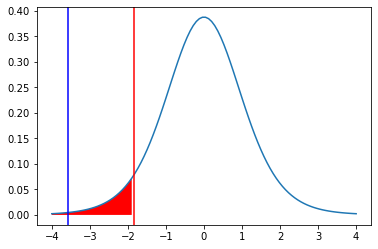

In [14]:
visual_test(t,tc,dist = 't',df=9)